# 통계분석의 기초

참고하면 좋은 영상:https://www.youtube.com/watch?v=06-AZXmwHjo&t=769s

## 1. 변수의 종류

### 1-1. 질적 변수와 양적변수

* **질적 변수**: 종류를 구별하기 위한 변수(예: 남성과 여성, 흡연여부, 혈액형 등)
* **양적 변수**: 수치와 양을 표현하는 변수(예: 시험점수, 신장 등)

단, 질적변수이지만 데이터 처리를 위해 남성은 0, 여성은 1과 같이 숫자 데이터로 표시하는 경우 도 있으므로, 수치변수라 해서 전부 양적 변수인 것은 아니다.

### 1-2. 척도 수준

* **명의 척도(명목척도)** - 단순 분류를 위한 척도(예: 학생번호, 전화번호, 성별 등)
* **순서 척도** - 순서 관계나 대소 관계에 의미가 있는 변수(예: 성적 순위, 만족도 등)
* **간격 척도** - 대소 관계를 포함해 그 차이에도 의미를 두는 변수(예: 연도, 온도 등)
* **비례 척도(비율척도)** - 대소관계, 차이, 비 모두에 의미가 있는 변수, 절대 영점 취급(예: 길이, 무게 등)

* **이산형 변수**: 0, 1, 2...과 같이 하나하나의 값을 취하는 변수, 서로 인접한 숫자 사이에 값이 존재하지 않는다.
(예: 결석 횟수, 학생 수 등)

* **연속형 변수**: 연속적인 값을 취하는 변수, 어떤 숫자 사이에도 반드시 숫자가 존재(길이, 무게, 시간 등)

# 2. 데이터 정리(1차원 데이터)

## 2-1. 데이터 중심의 지표

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 하는 함수
%precision 3
# 또는 아래와 같이 사용
pd.set_option('display.precision', 3)

In [3]:
df = pd.DataFrame(np.random.randn(7, 2))
df

,0,1
0,0.549,-0.181
1,0.340,0.750
2,1.996,-2.349
3,2.766,-0.754
4,0.099,-0.395
5,-0.514,-0.606
6,1.694,0.225


In [4]:
df = pd.read_csv('C:/Users/chunc/Desktop/취업캠프/python/교재/python_stat/data/ch2_scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [5]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [6]:

scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 평균값

In [7]:
sum(scores) / len(scores)

55.000

In [8]:
np.mean(scores)

55.000

In [9]:
scores_df.mean()

score    55.0
dtype: float64

### 중앙값

In [10]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [11]:
n = len(sorted_scores)

if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n + 1)//2 - 1]
median

56.500

In [12]:
np.median(scores)

56.500

In [13]:
scores_df.median()

score    56.5
dtype: float64

### 최빈값

In [14]:
pd.Series([1, 1, 1, 2, 2, 3]).mode()

0    1
dtype: int64

In [15]:
pd.Series([1, 2, 3, 4, 5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

## 2-2. 데이터의 산포도 지표

### 편차

In [16]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [17]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [18]:
np.mean(deviation)

0.000

In [19]:
np.mean(another_deviation)

0.000

In [20]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [21]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

### 분산

In [22]:
np.mean(deviation ** 2)

86.000

In [23]:
scores_df.var()

score    95.556
dtype: float64

In [24]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [25]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

### 표준편차

In [26]:
np.sqrt(np.var(scores, ddof = 0))

9.274

In [27]:
np.std(scores, ddof = 0)

9.274

## 2-3. 범위와 4분위수 범위

### 범위

In [28]:
np.max(scores) - np.min(scores)

28

### 4분위수 범위

In [29]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.000

In [30]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

## 2-4. 데이터의 정규화

###  정규화

* 값의 범위(scale)을 0 ~ 1사이의 값으로 바꿔주는 것
* 학습 전에 scaling하는 것
* 머신러닝에서 scale이 큰 feature의 영향이 비대해지는 것 방지
* 딥러닝에서 Local Minima에 빠질 위험을 감소(학습 속도 향상)
* scikit-learn에서 MinMaxScaler 사용

### 표준화

* 값의 범위(scale)을 평균 0, 분산 1이 되도록 바꿔주는 것
* 학습 전에 scaling하는 것
* 정규분포를 표준정규분포로 변환하는 것과 같다
* Z - score(표준 점수)
* -1 ~ 1 사이에 68%가 있고, -2 ~ 2 사이에 95%가 있고, -3 ~ 3 사이에 99%가 있음
* -3 ~ 3 의 범위를 벗어나면 이상치(outlier)일 확률이 높다
* scikit-learn에서 StandardScaler 사용

## 2-5. 1차원 데이터의 시각화

### 히스토그램

도수분포표를 막대그래프로 표현, 데이터의 분포 상태를 시각적으로 파악할 수 있다.

In [31]:
import matplotlib.pyplot as plt
# %matplotlib inline

In [32]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

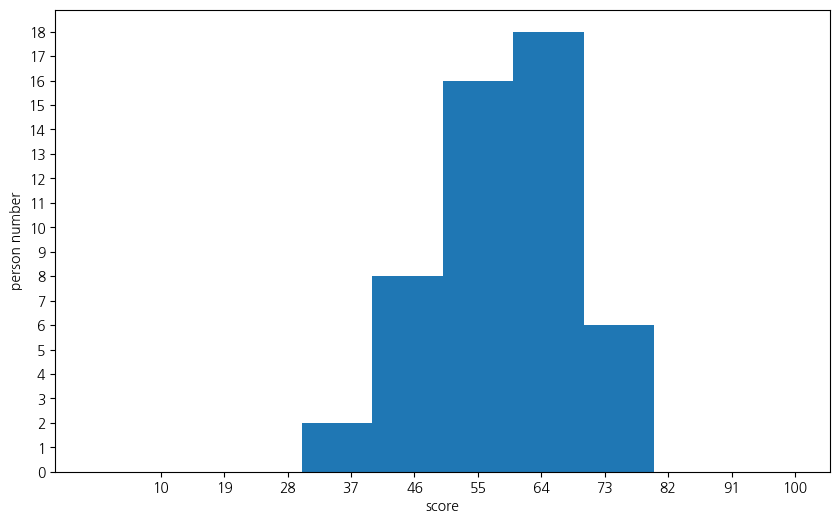

In [33]:
# 캔버스를 생성
# figsize로 가로, 세로 크기 지정
fig = plt.figure(figsize = (10, 6))
# 캔버스 위에 그래프를 그리기위한 영역 지정
# 인수는 영역을 1 x 1개 지정, 하나의 영역에 그린다는 것 의미
ax = fig.add_subplot(111)

# 계급수를 10으로 하여 히스토그램 그림
freq, _, _ = ax.hist(english_scores, bins = 10, range = (0, 100))

# x축에 레이블 부여
ax.set_xlabel('score')

# y축에 레이블 부여
ax.set_ylabel('person number')

# x축을 0, 10, 20 ,..., 100 눈금으로 구분
ax.set_xticks(np.linspace(10, 100, 10 + 1))

# Y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
# 그래프 표시
plt.show()

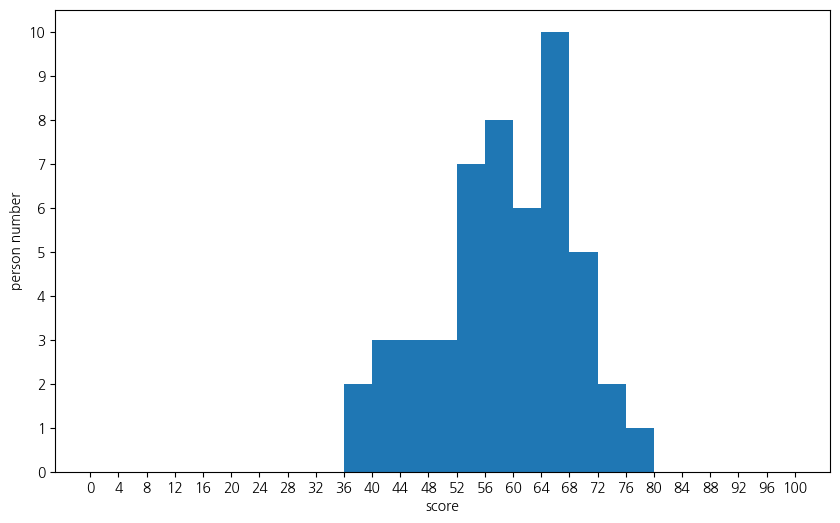

In [34]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

In [35]:
# subplot옵션 연습하기
X = np.linspace(0, 100, 20)
Y1 = X
Y2 = X ** 2
Y3 = np.sin(X)

C:\Anaconda3\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


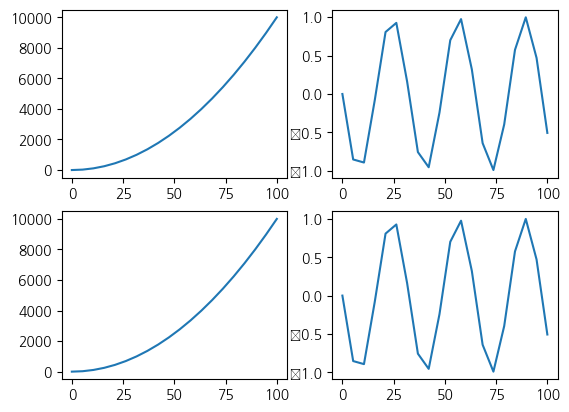

In [36]:
fig=plt.figure()



ax1 = fig.add_subplot(221)
ax1.plot(X,Y2)

ax2 = fig.add_subplot(222)
ax2.plot(X,Y3)

ax3 = fig.add_subplot(223)
ax3.plot(X,Y2)

ax4 = fig.add_subplot(224)
ax4.plot(X,Y3)
plt.show()

### 상자그림

데이터의 산포도를 표현
* 상자 -> Q1부터 Q3를 나타냄, 가운데는 중앙값
* 수염 -> Q1 - 1.5IQR부터 Q3 + 1.5IQR을 나타냄
* 여기에 들어가지 않는 데이터는 이상값

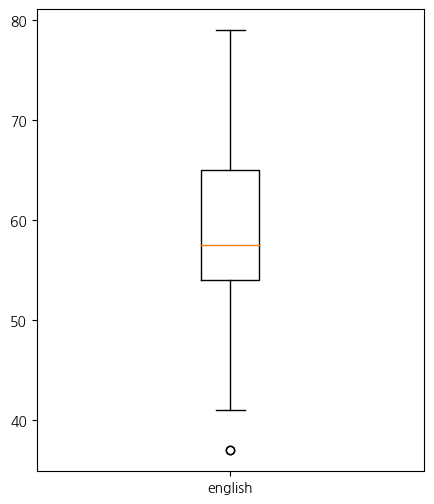

In [38]:
fig = plt.figure(figsize = (5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels = ['english'])
plt.show()

In [39]:
# 정규분포로 데이터를 생성해서 boxplot 그려보기
import numpy as np

# 평균 0, scale = 1, 샘플의 개수 1000개
s1 = np.random.normal(loc = 0, scale = 1, size = 1000)

# 평균 5, scale = 0.5, 샘플의 개수 1000개
s2 = np.random.normal(loc = 5, scale = 0.5, size = 1000)

# 평균 10, scale = 2, 샘플의 개수 1000개
s3 = np.random.normal(loc = 10, scale = 2, size = 1000)

C:\Anaconda3\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


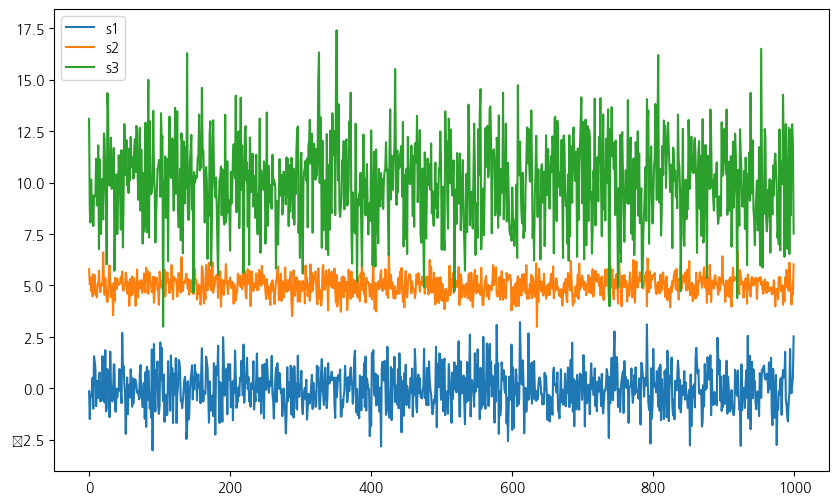

In [40]:
plt.figure(figsize = (10, 6))
plt.plot(s1, label = 's1')
plt.plot(s2, label = 's2')
plt.plot(s3, label = 's3')
plt.legend()
plt.show()

C:\Anaconda3\envs\pythonEx\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


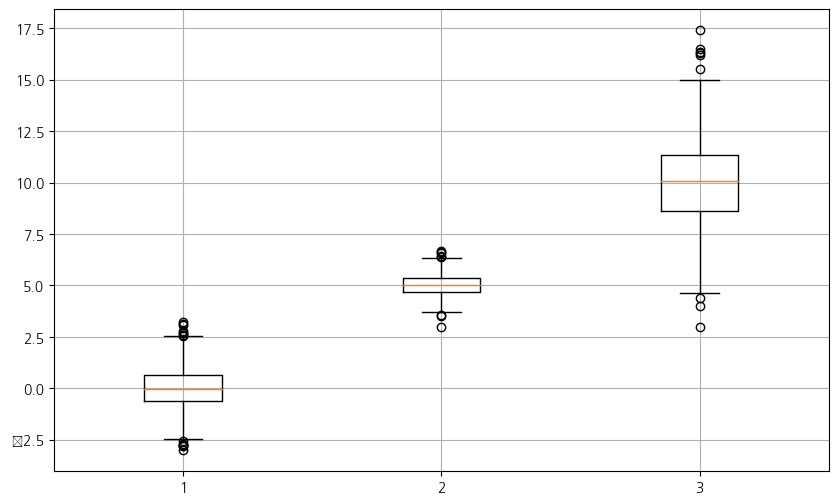

In [41]:
# boxplot으로 그려보기
plt.figure(figsize = (10, 6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

# 3. 데이터 정리(2차원 데이터)

## 3-1. 두 데이터의 관계를 나타내는 지표

In [43]:
# 데이터 불러오기
df = pd.read_csv('C:/Users/chunc/Desktop/취업캠프/python/교재/python_stat/data/ch2_scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [44]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 공분산

In [46]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df


,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [47]:
summary_df['product of deviations'].mean()

62.800

In [49]:
# numpy의 cov함수 사용
# 반환값은 공분산행렬, 분산공분산 행렬의 형태로 나타난다
# numpy에서는 모표준편차를 default로 한다 -> ddof = 0
# pandas에서는 표본표준편파를 default로 한다 -> ddof = 1
cov_mat = np.cov(en_scores, ma_scores, ddof = 0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [50]:
# python의 인덱스는 0부터 시작이므로, cov[0, 1]성분과 cov[1, 0] 성분이 공분산이 된다
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

In [51]:
# 영어와 영어의 공분산
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [52]:
# 영어와 수학의 분산
np.var(en_scores, ddof = 0), np.var(ma_scores, ddof = 0)

(86.000, 68.440)

분산과 일치함을 알 수 있다.

### 상관계수

* -1과 1사이의 값을 가진다
* 상관계수 = 1 -> 양의 상관관계
* 상관계수 = -1 -> 음의 상관관계
* 상관계수 = 0 -> 무상관

In [53]:
# 영어와 수학점수의 상관계수
np.cov(en_scores, ma_scores, ddof = 0)[0, 1] /\
(np.std(en_scores) * np.std(ma_scores))

0.819

In [54]:
# numpy함수의 상관계수
# 상관행렬의 형태
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [56]:
# corr()
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


## 3-2. 2차원 데이터의 시각화

### 산점도

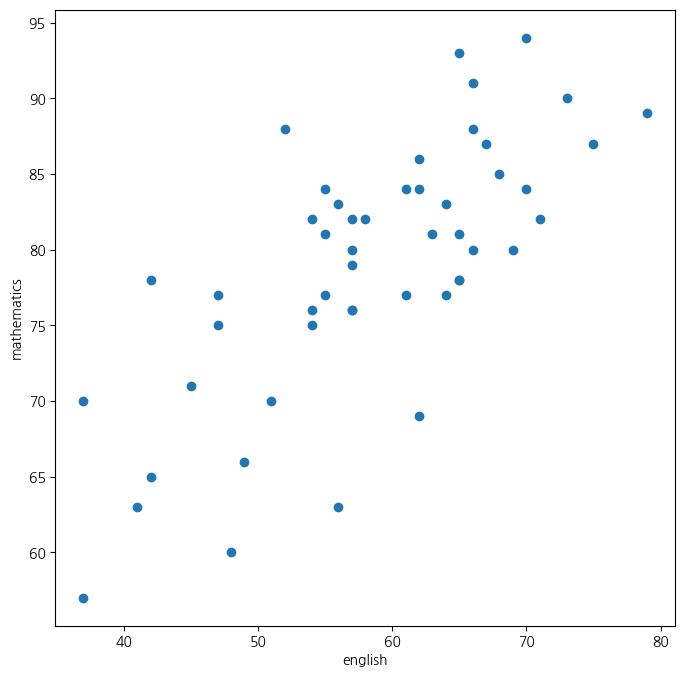

In [57]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)

# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()

### 회귀직선

두 데이터 사이의 관계를 나타내는 직선

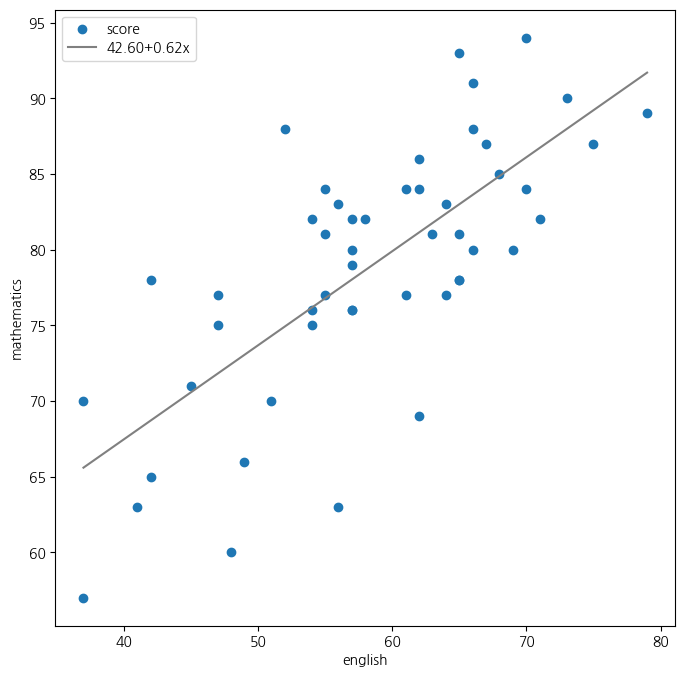

In [58]:
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)

# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())

# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()

In [59]:
# 기울기가 2, 절편이 1인 선형회귀모델 예측
# y = 2*x + 1
# x = []
# y = []
import numpy as np
# np.ndarray + range()
# 10행 1열의 데이터를 필요로 한다
x = np.arange(10).reshape(-1, 1)
print(x.shape)
print(x)

# 노이즈 발생
randValue = (np.random.random(n)*3).reshape(-1, 1)
y = (2*x + 1) + randValue
print(y.shape)
print(y)

(10, 1)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)
[[ 2.004]
 [ 4.06 ]
 [ 7.664]
 [ 8.745]
 [10.141]
 [13.519]
 [15.275]
 [17.478]
 [19.156]
 [19.086]]


[[2.009]]
[2.673]


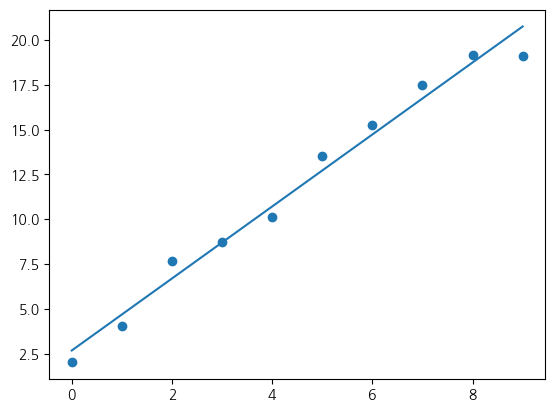

In [60]:
# scikit-learn의 linear regression함수로 선형회귀 구해보자
from sklearn.linear_model import LinearRegression

# 일단 선형회귀 모델을 생성한다.
model = LinearRegression()
# 데이터를 넣는다.(학습한다)
model.fit(x, y)
# 기울기
print(model.coef_)
# y절편
print(model.intercept_)
#학습된 모델을 사용해서 예측해본다.
# pred_y = model.predict(x)

# 직선의 방정식
model_y = model.coef_ * x + model.intercept_
# matplotlib으로 그려보기
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)
# 직선의 방정식 표현
plt.plot(x, model_y)
plt.show()

In [65]:
# 예제 연습
import pandas as pd
import numpy as np
x = [1, 2, 3, 4, 5, 6, 7]
# x2 = [3, 4, 5, 6, 7, 8, 9]

x = np.array(x).reshape(-1, 1)
# x2 = np.array(x2).reshape(-1, 1)
y = 3*x + 3
# y = 3*x1 + 4*x2 + 3
print(y.shape)
print(y)

(7, 1)
[[ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [24]]


[[3.]]
[3.]


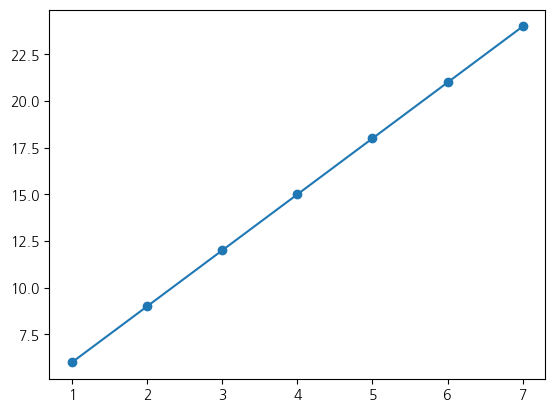

In [66]:
from sklearn.linear_model import LinearRegression

# 일단 선형회귀 모델을 생성한다.
model = LinearRegression()
# 데이터를 넣는다.(학습한다)
model.fit(x, y)
# 기울기
print(model.coef_)
# y절편
print(model.intercept_)
#학습된 모델을 사용해서 예측해본다.
# pred_y = model.predict(x)

# 직선의 방정식
model_y = model.coef_ * x + model.intercept_
# matplotlib으로 그려보기
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y)
# 직선의 방정식 표현
plt.plot(x, model_y)
plt.show()

### 히트맵

히스토그램의 2차원 버전, 색을 이용하여 표현할 수 있다.

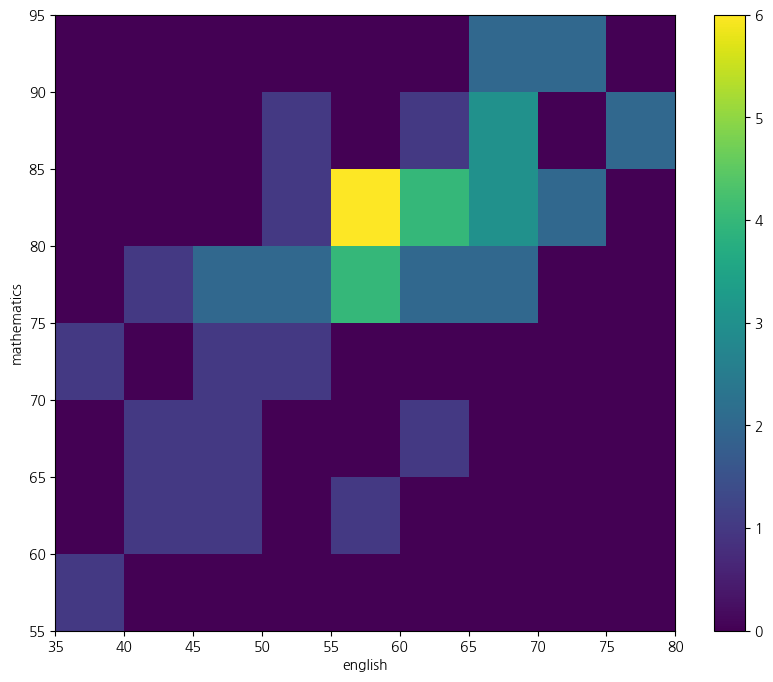

In [67]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)
plt.show()

### 인스컴

In [68]:
# npy 형식으로 저장된 NumPy array를 읽어들인다
anscombe_data = np.load('C:/Users/chunc/Desktop/취업캠프/python/교재/python_stat/data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [69]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


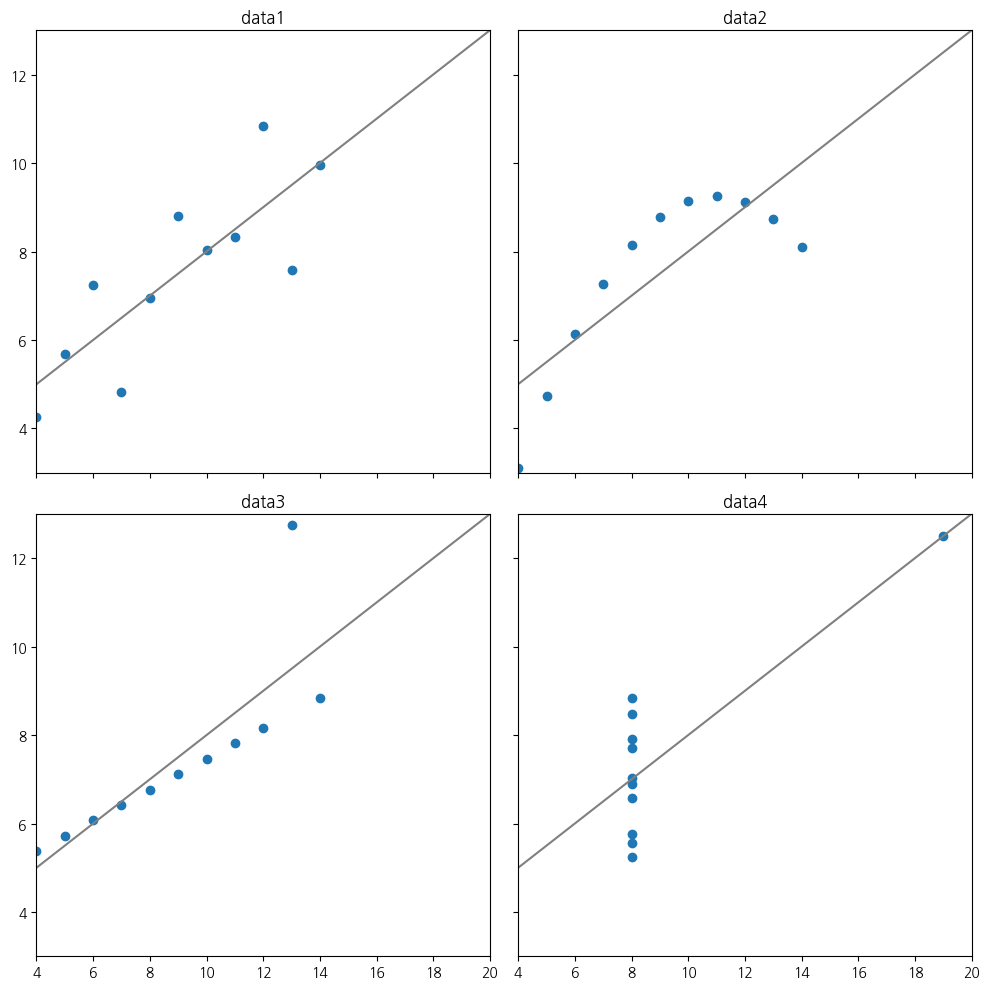

In [70]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()

# 4. 추론통계

## 모집단과 표본

* **모집단**: 추측하고 싶은 관측대상 전체
* **표본**: 추측에 사용하는 관측 대상의 일부분
* **표본추출**: 모집단에서 표본을 골라내는 일

## 표본 추출방법

* **무작위추출**: 임의로 표본을 추출하는 방법
* **복원추출**: 여러 차례 동일한 표본을 선택하는 추출방법
* **비복원추출**: 동일한 표본ㅇ느 한 번만 선택

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('C:/Users/chunc/Desktop/취업캠프/python/교재/python_stat/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [73]:
# 뽑았던 숫자를 또 뽑을 수 있다.(중복허용)
np.random.choice([1, 2, 3], 3)

array([3, 2, 1])

In [74]:
np.random.choice([1, 2, 3, 4, 5, 6], 3)

array([6, 2, 5])

In [75]:
# 중복허용을 하지 않는다 (replace=False)
np.random.choice([1, 2, 3], 3, replace=False)

array([2, 3, 1])

In [76]:
# seed값을 고정하게 되면 중복허용을 하지 않게 된다
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [77]:
np.random.seed(0)
sample = np.random.choice(scores, 20)

sample.mean()

70.400

In [78]:
scores.mean()

69.530

In [80]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i + 1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 70.7
2번째 무작위 추출로 얻은 표본평균 71.9
3번째 무작위 추출로 얻은 표본평균 71.25
4번째 무작위 추출로 얻은 표본평균 67.4
5번째 무작위 추출로 얻은 표본평균 67.7
